# Admin Notes

## Project
1. Reminder: Project final submissions are due on June 17 at 9AM (**we do not accept late submissions for this assignment**). 
1. Your TAs are aiming to give you feedback on your milestones as soon as possible but in the meantime, if you have any questions, let them know. 
1. Reminder: Be sure to schedule your project demo time by tonight (refer to Piazza for more details).

## Final Exam
1. Reminder: June 22, 2020 at 7PM (Vancouver time). Everyone will have to take it at the same time so for those of you who are in a different timezone, please adjust accordingly.
1. Reminder: we will only test on line graphs for the final. The other types of graphs are provided for your interest and in case you need it for the final.

## What's coming up?
1. We will talk about the solution to test 2 on Tuesday. The rest of the time will be a free-form office hour where you can get help with finishing the project. 
1. Thursday's class (the last one of the semester!) will be when we look at the final exam from 2019W2. We'll release the file and have some time where you work on the question (try to simulate exam conditions if you can) and then we'll cover the answer/approaches together.

In [5]:
from cs103 import *

# Reminders for the project
parse_int("4") # will give you 4 (as an int)
parse_int("23.4") #  will give you None (use parse_float instead!)
parse_int("s") # will give you None

parse_float("4") # will give you 4.0
parse_float("s") # will give you None
parse_float("34.2") # will give you 34.2 (as a float)

# You can also use the built in function float() but you will get errors if a non-decimal
# string is passed into the function whereas parse_float would just give you None in those
# cases
float("4.32") # returns 4.32
# float("s") # throws an error

# When in doubt, you can use the help function
help(parse_int)

Help on function parse_int in module cs103.parsing.parsing:

parse_int(s: str) -> Union[int, NoneType]
    return s as an integer, if possible; returns None if s is not an integer
    
    For example, parse_int('3') returns 3, but parse_int('3.2') and 
    parse_int('argh') both return None.



# Mapping Crime in Vancouver

Let's just have some plotting fun!

This is loosely an HtDAP design, but we've skipped the planning stages to keep it short! We're also working from the Module 7 VPD location project for fun :)

In [11]:
from cs103 import *
from typing import NamedTuple, List
from enum import Enum
import csv
from matplotlib import pyplot

##################
# Data Definitions

CrimeData = NamedTuple('CrimeData', [('x', float),
                                     ('y', float)])
# interp. data about a single crime in Vancouver with its x and y location.
# (Locations are in metres offset from a somewhat arbitrary point on the surface of
# the earth. (Caution: locations of (0, 0) are sometimes placeholders
# or intentionally inaccurate reports. Fortunately, that doesn't occur in the 
# subset of the data we're looking at.)
CD1 = CrimeData(0, 0)
CD2 = CrimeData(-3.5, 2.0)
CD3 = CrimeData(490258.683, 5458154.503)  # sample location actually pulled from our data

# template based on compound (2 fields)
@typecheck
def fn_for_crime_data(cd: CrimeData) -> ...:
    return ...(cd.x,
               cd.y)
    

# List[CrimeData]
# interp. a list of crime data
LOCD0 = []
LOCD1 = [CD1, CD2]

# template based on arbitrary-sized data and reference rule
@typecheck
def fn_for_locd(locd: List[CrimeData]) -> ...:
    # description of accumulator
    acc = ... # type: ...
    
    for cd in locd:
        acc = ...(fn_for_crime_data(cd), acc)
        
    return ...(acc)


# List[float]
# interp. a list of floats
LOF0 = []
LOF1 = [0, -3.5]

# template based on arbitrary-sized data
@typecheck
def fn_for_lof(lof: List[float]) -> ...:
    # description of accumulator
    acc = ... # type: ...
    
    for f in lof:
        acc = ...(f, acc)
        
    return ...(acc)

In [12]:
@typecheck
def read(filename: str) -> List[CrimeData]:
    """    
    reads information from the specified file and returns a list of crime data
    
    the file must be in the VPD crime format, and the x and y entries must be valid 
    floats.
    """
    # Note: in future, we might want to skip (0, 0) entries, but we won't now.
    
    #return []  #stub
    # Template from HtDAP

    # locd contains the result so far
    locd = [] # type: List[CrimeData]

    with open(filename) as csvfile:
        
        reader = csv.reader(csvfile)
        next(reader) # skip header line

        for row in reader:
            cd = CrimeData(parse_float(row[8]), parse_float(row[9]))
            locd.append(cd)
    
    return locd



start_testing()
expect(read("testfile_empty.csv"), []) 
expect(read("testfile_small.csv"), [CrimeData(0, 0),
                                    CrimeData(-3.5, 2.0)]) 

summary()


2 of 2 tests passed


In [22]:
help(pyplot.scatter)

Help on function scatter in module matplotlib.pyplot:

scatter(x, y, s=None, c=None, marker=None, cmap=None, norm=None, vmin=None, vmax=None, alpha=None, linewidths=None, verts=<deprecated parameter>, edgecolors=None, *, plotnonfinite=False, data=None, **kwargs)
    A scatter plot of *y* vs. *x* with varying marker size and/or color.
    
    Parameters
    ----------
    x, y : scalar or array-like, shape (n, )
        The data positions.
    
    s : scalar or array-like, shape (n, ), optional
        The marker size in points**2.
        Default is ``rcParams['lines.markersize'] ** 2``.
    
    c : color, sequence, or sequence of colors, optional
        The marker color. Possible values:
    
        - A single color format string.
        - A sequence of colors of length n.
        - A scalar or sequence of n numbers to be mapped to colors using
          *cmap* and *norm*.
        - A 2-D array in which the rows are RGB or RGBA.
    
        Note that *c* should not be a single 

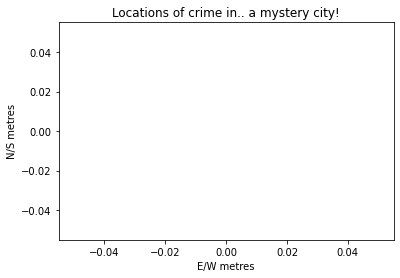

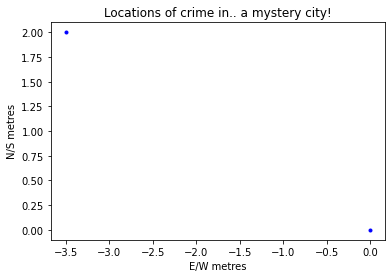

2 of 2 tests passed


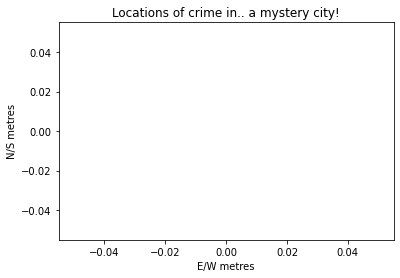

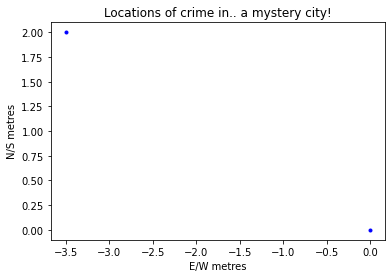

2 of 2 tests passed
2 of 2 tests passed
2 of 2 tests passed


In [20]:
@typecheck
def main(filename: str) -> None:
    """
    Reads the crime data from given filename and plots its locations.
    There's no computation here; so, this wouldn't be enough for a project.
    (But if we also plotted the average location, maybe with a really big star,
    that averaging computation would be enough!)
    """
    # We might want to rename main, but I left it as is just to emphasize that
    # that is OK here as well. Our file should have a good name, however!
    
    #return None #stub
    # Template from HtDAP, based on function composition 
    return analyze(read(filename))     


@typecheck
def analyze(locd: List[CrimeData]) -> None: 
    """ 
    Plots the locations in locd.
    """ 
    #return None  #stub
    # Template from visualization
    
    x_values = get_x_locations(locd)
    y_values = get_y_locations(locd)

    # set the labels for the axes
    pyplot.xlabel('E/W metres')
    pyplot.ylabel('N/S metres')
    pyplot.title('Locations of crime in.. a mystery city!')

    # create the scatterplot, with markers that are 
    # blue (c='b') and little dots (marker='.')
    pyplot.scatter(x_values,y_values, marker='.', c='b')

    # show the plot
    pyplot.show()  
    
    return None

@typecheck
def get_x_locations(locd: List[CrimeData]) -> List[float]:
    """
    return the x locations from locd
    """
    #return []  #stub
    # template from List[CrimeData]
    
    # acc is the result so far
    acc = [] # type: List[float]
    
    for cd in locd:
        acc.append(cd.x)
        
    return acc

@typecheck
def get_y_locations(locd: List[CrimeData]) -> List[float]:
    """
    return the y locations from locd
    """
    #return []  #stub
    # template from List[CrimeData]
    
    # acc is the result so far
    acc = [] # type: List[float]
    
    for cd in locd:
        acc.append(cd.y)
        
    return acc

start_testing()
# Should produce an empty plot with: title "Locations of crime in.. a mystery city!",
# x and y axis labels showing east/west metres and north/south metres (respectively).
expect(main("testfile_empty.csv"), None) 

# Should produce a similar plot except with a point at (0,0) and another at (-3.5, 2).
# Points should be blue dots. (On an exam I'd totally sketch this, but in Jupyter this
# one is short enough to describe that typing this out is faster!)
expect(main("testfile_small.csv"), None)
summary()

start_testing()
# See above (main) for descriptions of what these should produce.
expect(analyze([]), None) 
expect(analyze([CrimeData(0, 0), CrimeData(-3.5, 2.0)]), None)
summary()

start_testing()
expect(get_x_locations([]), []) 
expect(get_x_locations([CrimeData(0, 0), CrimeData(-3.5, 2.0)]), [0, -3.5])
summary()

start_testing()
expect(get_y_locations([]), []) 
expect(get_y_locations([CrimeData(0, 0), CrimeData(-3.5, 2.0)]), [0, 2.0])
summary()

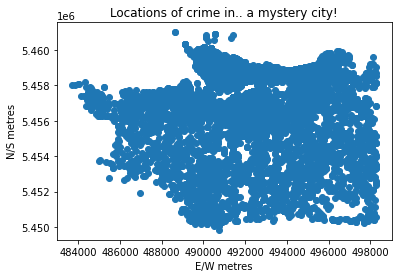

In [19]:
# Here is our overall average location!
main("crimedata_subset_bne_theft_of_bike_veh_2018.csv")

Whoa now, what city is that? Check out [the formal boundaries of this city](https://www.google.ca/maps/place/Vancouver,+BC/@49.2578263,-123.193944,12z/data=!3m1!4b1!4m5!3m4!1s0x548673f143a94fb3:0xbb9196ea9b81f38b!8m2!3d49.2827291!4d-123.1207375).
